


# **Q_3 Report, Ali Afshar Degarsi**




In [ ]:
data_file_id = '1rnJxigUwzlzI_x4JejafLXDUpT8bDQZq'

import downloader and download data:

In [ ]:
# import downloader and download data
!pip install gdown
import gdown

gdown.download(f'https://drive.google.com/uc?id={data_file_id}', 'wifi_data.txt', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rnJxigUwzlzI_x4JejafLXDUpT8bDQZq
To: /content/wifi_data.txt
100%|██████████| 62.0k/62.0k [00:00<00:00, 53.6MB/s]


'wifi_data.txt'

# Preprocessing:

read and show some instances of data:

In [ ]:
import pandas as pd

file_path = 'wifi_data.txt'

# Define column names for clarity
# 7 routers + 1 region column
column_names = ['Router1', 'Router2', 'Router3', 'Router4', 'Router5', 'Router6', 'Router7', 'Region']

# Read the data from the text file
# header=None: because file doesn't have a header row
# sep='\t': because the columns are separated by tabs.
# names=column_names: to assign meaningful names to the columns
try:
  df = pd.read_csv(file_path, header=None, sep='\t', names=column_names)

  # Display the first 5 rows to verify it was read correctly
  print("Data loaded successfully! Here are the first 5 rows:")
  print(df.head())

  # Display the data types to ensure they are correct
  print("\nData Info:")
  df.info()

except FileNotFoundError:
  print(f"Error: The file was not found at the path: {file_path}")

Data loaded successfully! Here are the first 5 rows:
   Router1  Router2  Router3  Router4  Router5  Router6  Router7  Region
0      -64      -56      -61      -66      -71      -82      -81       1
1      -68      -57      -61      -65      -71      -85      -85       1
2      -63      -60      -60      -67      -76      -85      -84       1
3      -61      -60      -68      -62      -77      -90      -80       1
4      -63      -65      -60      -63      -77      -81      -87       1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Router1  2000 non-null   int64
 1   Router2  2000 non-null   int64
 2   Router3  2000 non-null   int64
 3   Router4  2000 non-null   int64
 4   Router5  2000 non-null   int64
 5   Router6  2000 non-null   int64
 6   Router7  2000 non-null   int64
 7   Region   2000 non-null   int64
dtypes: int64(8)
memory usage: 

# Part one - raw Logistic Regression for region 1 and 3

filter data based on regions - only 1 and 3 region classes - then shuffle data:

In [ ]:
import numpy as np


# --- Filter the Data for Regions 1 and 3 ---
# We start with the full DataFrame 'df' from the previous step
df_subset = df[df['Region'].isin([1, 3])].copy()

# Shuffle the data to ensure randomness
df_subset = df_subset.sample(frac=1, random_state=7).reset_index(drop=True)

print(f"Total samples for regions 1 and 3: {len(df_subset)}")
print("Class distribution in the full subset:")
print(df_subset['Region'].value_counts(normalize=True))
print("-" * 30)

Total samples for regions 1 and 3: 1000
Class distribution in the full subset:
Region
3    0.5
1    0.5
Name: proportion, dtype: float64
------------------------------


splitting data to 80% train and 20% test, but without stratify:



> first i use stratified splitting, but i got same result for raw Logistic Regression and with L2, so i turn it off to see the diffrence when we used regularization, and model can act better on that. thats why i commented stratify line on code.



In [ ]:
from sklearn.model_selection import train_test_split

# --- Prepare Features (X) and Labels (y) for the Subset ---
X_subset = df_subset.drop('Region', axis=1)
y_subset = df_subset['Region']


# --- Perform Train-Test Split (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_subset,
    y_subset,
    test_size=0.2,
    random_state=7,
    # stratify=y_subset # This ensures equal distribution!
)

print("Class distribution in the training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in the testing set:")
print(y_test.value_counts(normalize=True))
print("-" * 30)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Class distribution in the training set:
Region
1    0.51625
3    0.48375
Name: proportion, dtype: float64

Class distribution in the testing set:
Region
3    0.565
1    0.435
Name: proportion, dtype: float64
------------------------------
Training set size: 800 samples
Testing set size: 200 samples


apply Logistic Regression and show model informations:

In [ ]:
from sklearn.linear_model import LogisticRegression

# --- Initialize and Train the Logistic Regression Model ---
# We use random_state for reproducibility of the model's training process.
# max_iter is increased to ensure the model finds a solution.
model = LogisticRegression(random_state=7, max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")
print(f"Model classes: {model.classes_}") # Shows which regions it learned to predict
print(f"Model parameters(Wi): {model.coef_}")
print(f"Model intercept(W0): {model.intercept_}")

Logistic Regression model trained successfully!
Model classes: [1 3]
Model parameters(Wi): [[ 0.97291187 -0.49888086  0.57770972  1.03691554  0.55325764 -0.20322101
  -0.1967137 ]]
Model intercept(W0): [121.97413855]


report evaluation metrics:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Make Predictions on the Test Set ---
y_pred = model.predict(X_test)


# --- Calculate and Display Performance Metrics ---
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")

# Classification Report (Precision, Recall, F1-Score)
# This gives a detailed breakdown of performance for each class.
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98        87
           3       0.99      0.98      0.99       113

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



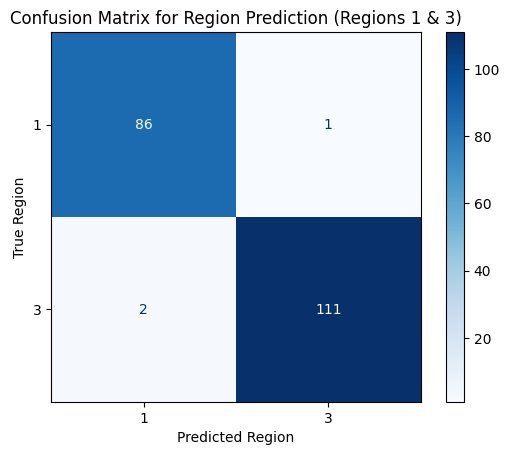

In [ ]:
import matplotlib.pyplot as plt

# --- Plot the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# using ConfusionMatrixDisplay for a nice plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Region Prediction (Regions 1 & 3)')
plt.xlabel('Predicted Region')
plt.ylabel('True Region')
plt.show()

# Part two - Logistic Regression with Ridge(L2)

Evaluating with L2 Regularization (alpha=0.5, C=2.0)

Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99        87
           3       0.99      0.99      0.99       113

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



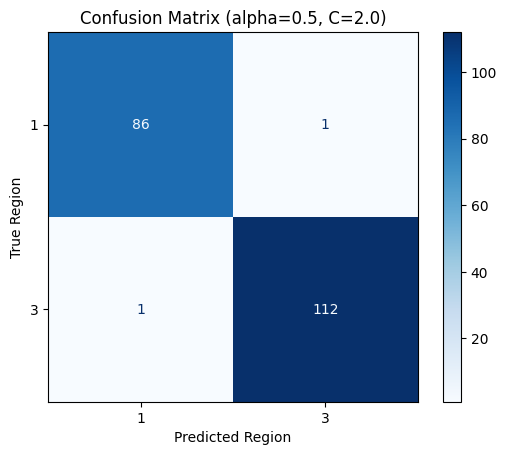



Evaluating with L2 Regularization (alpha=1.0, C=1.0)

Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98        87
           3       0.99      0.98      0.99       113

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



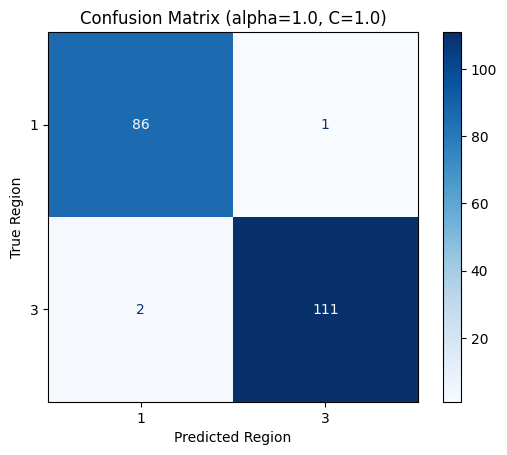



Evaluating with L2 Regularization (alpha=2.0, C=0.5)

Accuracy: 0.9850

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98        87
           3       0.99      0.98      0.99       113

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



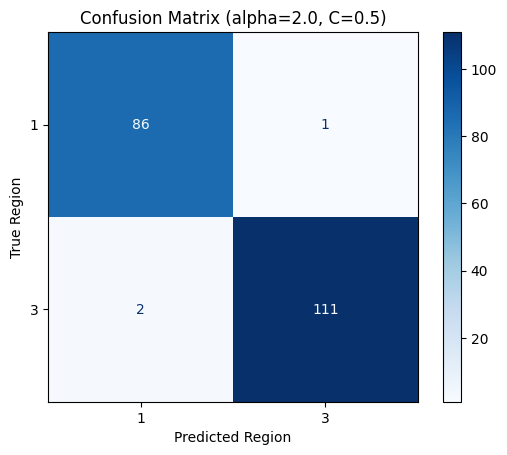

In [ ]:
# Define the alpha values requested and their corresponding C values for scikit-learn
alpha_values = [0.5, 1.0, 2.0]
C_values = [1/0.5, 1/1.0, 1/2.0] # Corresponds to [2.0, 1.0, 0.5]

for alpha, C in zip(alpha_values, C_values):
    print("="*60)
    print(f"Evaluating with L2 Regularization (alpha={alpha}, C={C})")
    print("="*60)

    # Initialize and Train the Model
    # penalty='l2' specifies L2 regularization
    # C is the inverse of regularization strength
    model = LogisticRegression(penalty='l2', C=C, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    # Calculate and Report Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (alpha={alpha}, C={C})')
    plt.xlabel('Predicted Region')
    plt.ylabel('True Region')
    plt.show()

    print("\n" + "="*60 + "\n")

# Part three - raw Logistic Regression for all regions

In [ ]:
# Features (X) are all columns EXCEPT the last one ('Region')
X = df.drop('Region', axis=1) # axis=1 means we are dropping a column

# Labels (y) are ONLY the 'Region' column
y = df['Region']

# --- Verification ---
print("Shape of Features (X):", X.shape)
print("Shape of Labels (y):", y.shape)

print("\nFirst 5 rows of Features (X):")
print(X.head())

print("\nFirst 5 rows of Labels (y):")
print(y.head())

print("\nClass distribution in the full dataset:")
print(y.value_counts(normalize=True))

Shape of Features (X): (2000, 7)
Shape of Labels (y): (2000,)

First 5 rows of Features (X):
   Router1  Router2  Router3  Router4  Router5  Router6  Router7
0      -64      -56      -61      -66      -71      -82      -81
1      -68      -57      -61      -65      -71      -85      -85
2      -63      -60      -60      -67      -76      -85      -84
3      -61      -60      -68      -62      -77      -90      -80
4      -63      -65      -60      -63      -77      -81      -87

First 5 rows of Labels (y):
0    1
1    1
2    1
3    1
4    1
Name: Region, dtype: int64

Class distribution in the full dataset:
Region
1    0.25
2    0.25
3    0.25
4    0.25
Name: proportion, dtype: float64
------------------------------


Perform Stratified Train-Test Split (80% train, 20% test):

In [ ]:
# stratify=y ensures the proportion of all 4 regions is the same in train/test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=7,
    stratify=y
)

print("Class distribution in the training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in the testing set:")
print(y_test.value_counts(normalize=True))
print("-" * 30)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Class distribution in the training set:
Region
1    0.25
3    0.25
4    0.25
2    0.25
Name: proportion, dtype: float64

Class distribution in the testing set:
Region
2    0.25
4    0.25
1    0.25
3    0.25
Name: proportion, dtype: float64
------------------------------
Training set size: 1600 samples
Testing set size: 400 samples




Initialize and Train the Logistic Regression Model:

In [ ]:

# For multi-class problems, scikit-learn uses a 'one-vs-rest' strategy by default.
model = LogisticRegression(random_state=7, max_iter=10000)
model.fit(X_train, y_train)

print("Logistic Regression model trained on all 4 regions successfully!")
print(f"Model classes learned: {model.classes_}")

Logistic Regression model trained on all 4 regions successfully!
Model classes learned: [1 2 3 4]




Make Predictions on the Test Set then Calculate and Display Performance Metrics:

In [ ]:
y_pred = model.predict(X_test)


# Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy:.4f}\n")

# Detailed Classification Report
# This shows precision, recall, and f1-score for EACH region.
print("Classification Report:")
print(classification_report(y_test, y_pred))

Overall Model Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       100
           2       0.98      0.95      0.96       100
           3       0.94      0.97      0.96       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400





Plot the Confusion Matrix:


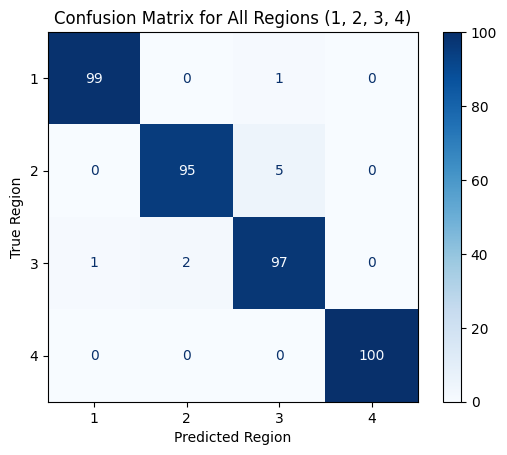

In [ ]:
# The matrix will now be 4x4, one row/column for each region.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for All Regions (1, 2, 3, 4)')
plt.xlabel('Predicted Region')
plt.ylabel('True Region')
plt.show()